In [ ]:
import torch
from torch.utils.data import Dataset
import nibabel as nib
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader
#sys append
import sys
git_dir = Path.home() / 'Documents' / 'DTU' / 'E23' / '02456_Deep_Learning' / 'Brain_Project' / 'BRaTS_UNET'
sys.path.append(str(git_dir))
from UNET3D.data_loader import BrainDataset
from UNET3D.unet_model.unet_model import UNet3D
model = UNet3D(n_channels=4, n_classes=3, bilinear=True)
#Number of parameters
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

In [ ]:
#Load dataset
data_dir = git_dir / 'data' / 'archive' 
patient_ids = ['BraTS2021_00495']
dataset = BrainDataset(patient_ids=patient_ids, data_dir=data_dir)
#test dataloader with bath size 1
test_loader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)
for batch in test_loader:
    input, target = batch
    print(f'input shape: {input.shape}')
    print(f'target shape: {target.shape}')


In [ ]:
model = UNet3D(n_channels=4, n_classes=4)
pred = model(input)

In [ ]:
import torch
data = torch.tensor([1,2,3,4,5,6,7,8,9,10])
clamp = torch.clamp(data, min=5, max=8)
print(clamp)

In [ ]:
import numpy as np
class_test = np.array([1,1,1,2,2,2,3,3,3,0,0,2,3,1])
distributions = []
class_counts = np.bincount(class_test)
print(class_counts.flatten().shape)
print(class_counts)
distributions.append(class_counts.flatten())
print(distributions[0].shape)
distributions = np.asarray(distributions)
np.save('distributions.npy', distributions)

<AxesSubplot: >

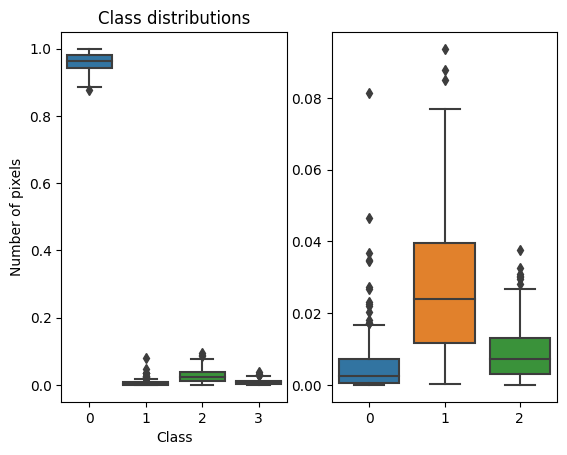

In [21]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
dir = Path.home() / 'Documents' / 'DTU' / 'E23' / '02456_Deep_Learning' / 'Brain_Project' / 'BRaTS_UNET'
distributions = np.load(dir / 'class_distributions.npy')
avg_distributions = distributions/np.sum(distributions, axis=1)[:,None]
#Plot histrogram for every patient on top of each other

#Make all y-axis the same
y_max = np.max(distributions)
y_min = np.min(distributions)+10e-5


# class_means = np.mean(distributions, axis=0)
# class_std = np.std(distributions, axis=0)
# for i in range(4):
#     #boxplot with sns 2x2 subplots
#     plt.subplot(2,2,i+1)
#     #data = distributions[:,i]/np.sum(distributions[:,i])
#     #sns.boxplot(data=np.log(distributions[:,i]))
#     #sns.boxplot(data=distributions[:,i])
#     #Plot 4 boxplots in one figure
#     sns.boxplot(data=distributions[:,i])
    
#     plt.title(f'Class {i}')
# plt.show()  

#Make in boxplot with all classes in one figure
#1x2 subplots
plt.subplot(1,2,1)
#Histogram
#plt.hist(np.sum(distributions,axis=0), bins=100)
sns.boxplot(data=avg_distributions)
plt.title('Class distributions')
plt.xlabel('Class')
plt.ylabel('Number of pixels')

plt.subplot(1,2,2)
#plot last 3 classes
sns.boxplot(data=avg_distributions[:,1:])


[1997913   17214   57773   24252]
2097152
[0.95267916 0.00820827 0.02754831 0.01156425]
[0.95267916 0.00820827 0.02754831 0.01156425]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.boxplot(distributions[:, 0])

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axs.flatten()):
    counts, bins = np.histogram(total_classes[i])
    ax.hist(bins[:-1], bins, weights=counts)
    ax.set_title(f'Class idx: {i}')
    ax.set_xlabel('Patient id')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axs.flatten()):
    counts, bins = np.histogram(total_classes[i])
    ax.hist(bins[:-1], bins, weights=counts)
    ax.set_title(f'Class idx: {i}')
    ax.set_xlabel('Patient id')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
import torch

test = torch.randint(0, 4, (1,2,2,2,2))
print(test)
print(test.min())
print(test.max())
#Min max scaling
test = (test - test.min()) / (test.max() - test.min())
print(test)

In [ ]:
import torch.nn.functional as F
import torch
#argmax
test = torch.tensor([[[[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]]]])
one_hot = F.one_hot(test.argmax(dim=1), num_classes=3)
print(test.flatten().size(0))

In [3]:
import monai
from monai.losses import GeneralizedDiceFocalLoss
import torch.nn.functional as F

data = torch.rand(0,4,[1,4,128,128,128])
target = torch.randint(0,4,[1,1,128,128,128])
criterion = GeneralizedDiceFocalLoss(to_onehot_y=True, softmax=True)
loss = criterion(data,target)
print(loss)


ModuleNotFoundError: No module named 'monai'